***Preliminary data analysis***

In [1]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Data_processing')
import numpy as np
import pandas as pd
from data_processing import KOProcessor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from matplotlib.patches import Patch
import matplotlib as mpl
from scipy.stats import pearsonr


In [12]:
# Initialize processor with dataset paths  
processor = KOProcessor(  
    terms_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/terms_KO.zip', #Absolute path was used due to bug in relative path
    terms_csv_path = 'terms_KO.csv',
    traits_reduced_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/reducedDataset.zip', #Absolute path was used due to bug in relative path
    traits_reduced_csv_path = 'reducedDataset.csv',
    traits_assembled_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/assembledDataset.zip', #Absolute path was used due to bug in relative path
    traits_assembled_csv_path = 'assembledDataset.csv' 
)  

# Load datasets from ZIP  
ko_terms = processor.load_terms()  # KO annotations  
reduced_traits = processor.load_reduced_traits_data()  # Primary traits  
assembled_traits = processor.load_assembled_traits_data()  # Supplemental traits  

# Display raw data structure  
print("KO Terms Columns:", ko_terms.columns.tolist())  
print("Reduced Traits Columns:", reduced_traits.columns.tolist())
print("Assembled Traits Columns:", assembled_traits.columns.tolist())
print("KO Terms Shape:", ko_terms.shape)
print("Reduced Traits Shape:", reduced_traits.shape)
print("Assembled Traits Shape:", assembled_traits.shape)
display(assembled_traits.head(10))


Data loaded successfully:
   Unnamed: 0   key      KO
0           0  1000  K00001
1           1  1000  K13954
2           2  1000  K00003
3           3  1000  K00013
4           4  1000  K00014
Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobac

,Unnamed: 0,database,taxID,bacdiveID,speciesStrainComp,genusComp,speciesComp,strainComp,speciesStrain,genus,...,producedComp,pathogenicity,reducedEnzAct,increasedEnzAct,variableEnzAct,extremophile,abSusceptible,genes,ref,genomeAccNo
0,0,bacdive,NaN,1.0,acetobacteracetib4114,acetobacter,acetobacteraceti,b4114,Acetobacter aceti B 4114,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,bacdive,NaN,2.0,acetobacteracetidsm3508,acetobacter,acetobacteraceti,dsm3508,Acetobacter aceti DSM 3508,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_000193495|GCA_002005445|GCA_004341595|GCA_...
2,2,bacdive,NaN,3.0,acetobactercerevisiaedsm2324,acetobacter,acetobactercerevisiae,dsm2324,Acetobacter cerevisiae DSM 2324,Acetobacter,...,acetic acid|vinegar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,bacdive,NaN,4.0,acetobacterpasteurianus190,acetobacter,acetobacterpasteurianus,190,Acetobacter pasteurianus 190,Acetobacter,...,NaN,NaN,NaN,catalase,NaN,NaN,NaN,NaN,NaN,GCA_003850805|GCA_000285275|GCA_003332155
4,4,bacdive,NaN,5.0,acetobacterpasteurianusasaia5bu121porges38,acetobacter,acetobacterpasteurianus,asaia5bu121porges38,"Acetobacter pasteurianus Asai A-5, BU 121, Por...",Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BACG00000000
5,5,bacdive,NaN,6.0,acetobacterpasteurianusbu117,acetobacter,acetobacterpasteurianus,bu117,Acetobacter pasteurianus BU 117,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,bacdive,NaN,7.0,acetobacterpasteurianusbu343,acetobacter,acetobacterpasteurianus,bu343,Acetobacter pasteurianus BU 343,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_003850845|1226664.3
7,7,bacdive,NaN,8.0,acetobacterorleanensis,acetobacter,acetobacterorleanensis,NaN,Acetobacter orleanensis,Acetobacter,...,restriction endonuclease AorI (BstNI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_001581005|GCA_006539325|GCA_002358055|GCA_...
8,8,bacdive,NaN,9.0,acetobacterlovaniensis,acetobacter,acetobacterlovaniensis,NaN,Acetobacter lovaniensis,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_014207635|GCA_011516875
9,9,bacdive,NaN,10.0,acetobacterestunensis,acetobacter,acetobacterestunensis,NaN,Acetobacter estunensis,Acetobacter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCA_019083805|GCA_011516945


c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'substrate'. Unique keys: 3226


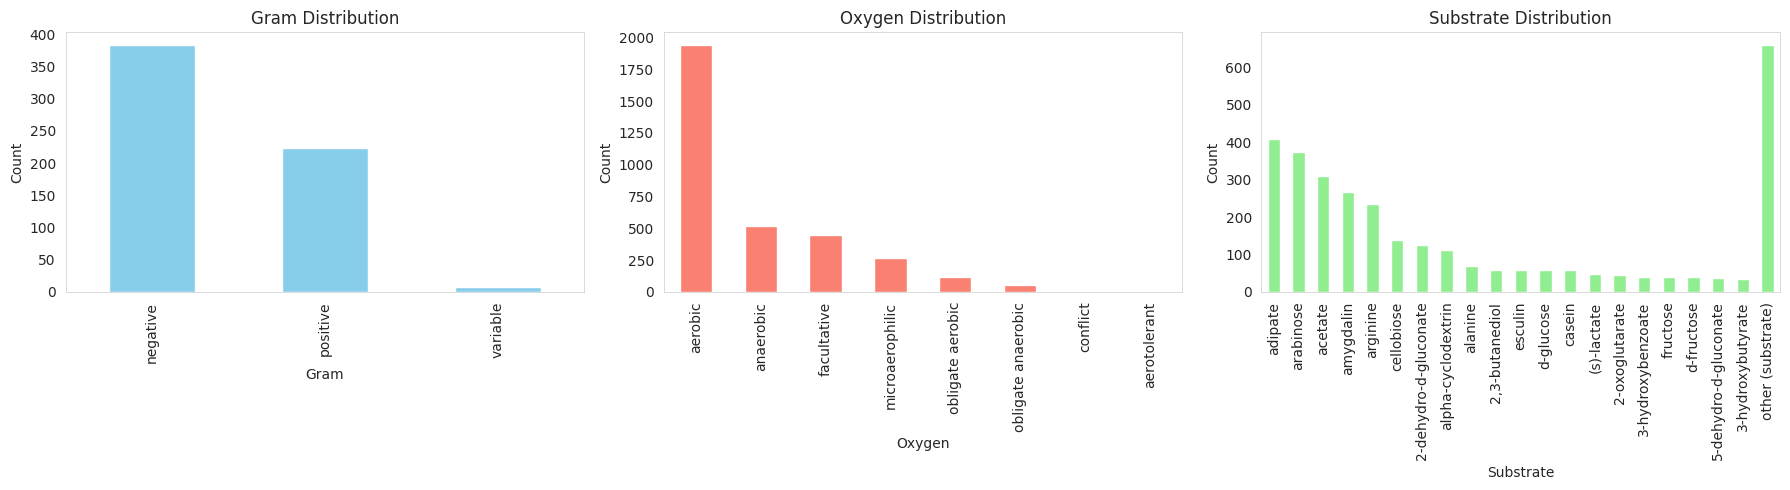

In [ ]:
# Plot distributions for gram, oxygen, and substrate traits  

def group_top_n_counts(counts, trait, top_n=20):
    if len(counts) > top_n:
        top = counts.nlargest(top_n)
        other_sum = counts.drop(top.index).sum()
        top[f'other ({trait})'] = other_sum
        return top
    else:
        return counts

# Prepare figure
grid_traits = [
    ('gram', reduced_traits['gram'].value_counts()),
    ('oxygen', reduced_traits['oxygen'].value_counts()),
    ('substrate', processor.preprocess_traits(
        reduced_traits, 'substrate', use_assembled_if_missing=True
    ).value_counts())
]

bar_colors = ['skyblue', 'salmon', 'lightgreen']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (trait, counts), color in zip(axes, grid_traits, bar_colors):
    # Group beyond top 20 for bar
    grouped = group_top_n_counts(counts, trait, top_n=20)
    # Plot
    grouped.plot(
        kind='bar',
        ax=ax,
        title=f'{trait.capitalize()} Distribution',
        color=color
    )
    ax.set_xlabel(trait.capitalize())
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


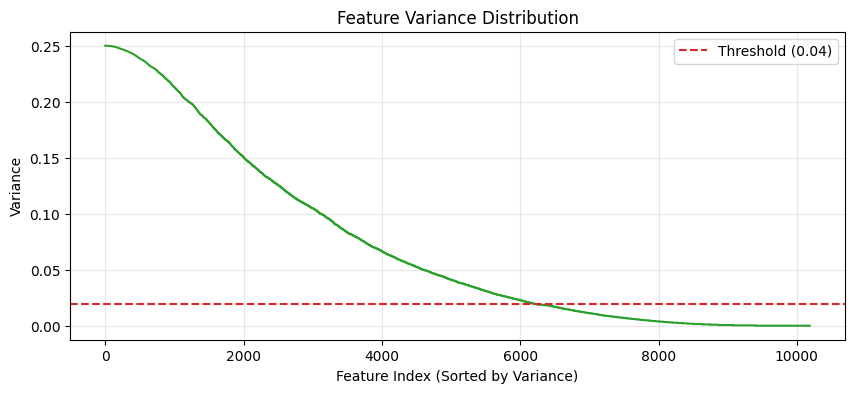

In [4]:
# Compute variance for KO terms  
X_terms = processor.preprocess_terms(ko_terms)  
variances = X_terms.var(axis=0).sort_values(ascending=False)  

# Plot variance across features  
plt.figure(figsize=(10, 4))  
plt.plot(range(len(variances)), variances.values, linestyle='-', color='#2ca02c')  
plt.axhline(y=0.02, color='#d62728', linestyle='--', label='Threshold (0.04)')  
plt.title('Feature Variance Distribution', fontsize=12)  
plt.xlabel('Feature Index (Sorted by Variance)', fontsize=10)  
plt.ylabel('Variance', fontsize=10)  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

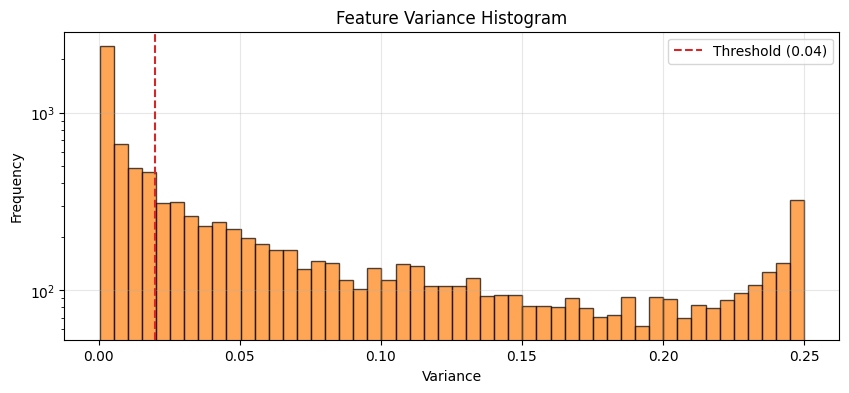

In [5]:
# Histogram of feature variances  
plt.figure(figsize=(10, 4))  
plt.hist(variances, bins=50, color='#ff7f0e', edgecolor='black', alpha=0.7)  
plt.axvline(x=0.02, color='#d62728', linestyle='--', label='Threshold (0.04)')  
plt.title('Feature Variance Histogram', fontsize=12)  
plt.xlabel('Variance', fontsize=10)  
plt.ylabel('Frequency', fontsize=10)  
plt.yscale('log')  # Log scale for skewed distributions  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobacterium  acetanaerobacterium   

                         species                   speciesComp      strain  \
0          Abiotrophia defectiva          abiotrophiadefectiva  ATCC 49176   
1     

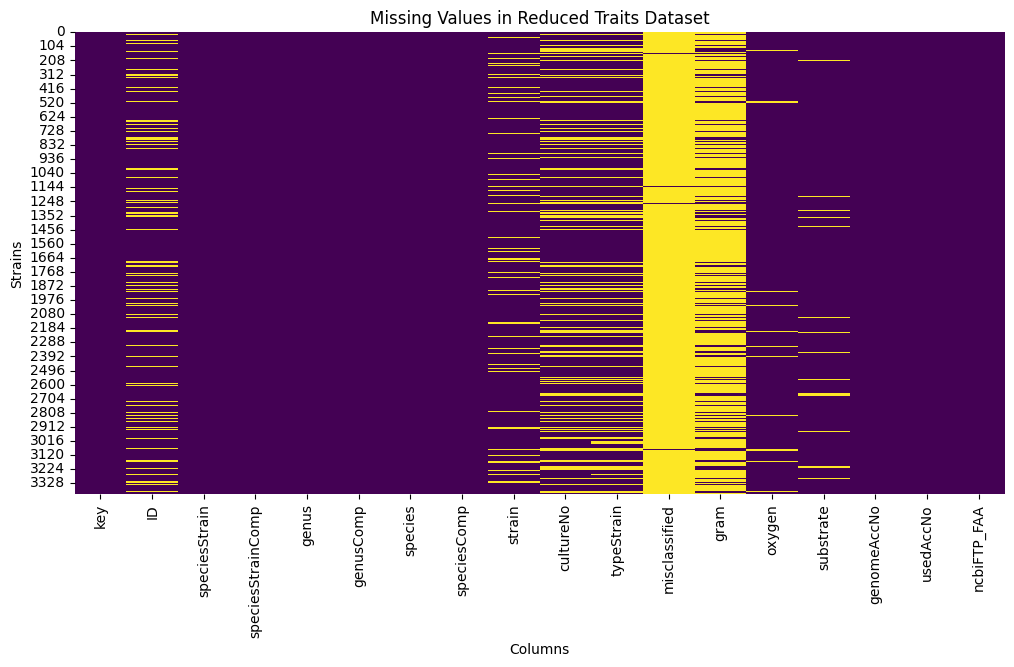

In [6]:
# Load reduced traits data  
reduced_traits = processor.load_reduced_traits_data()  

# Plot missing data  
plt.figure(figsize=(12, 6))  
sns.heatmap(reduced_traits.isnull(), cbar=False, cmap='viridis')  
plt.title('Missing Values in Reduced Traits Dataset')  
plt.xlabel('Columns')  
plt.ylabel('Strains')  
plt.show()  

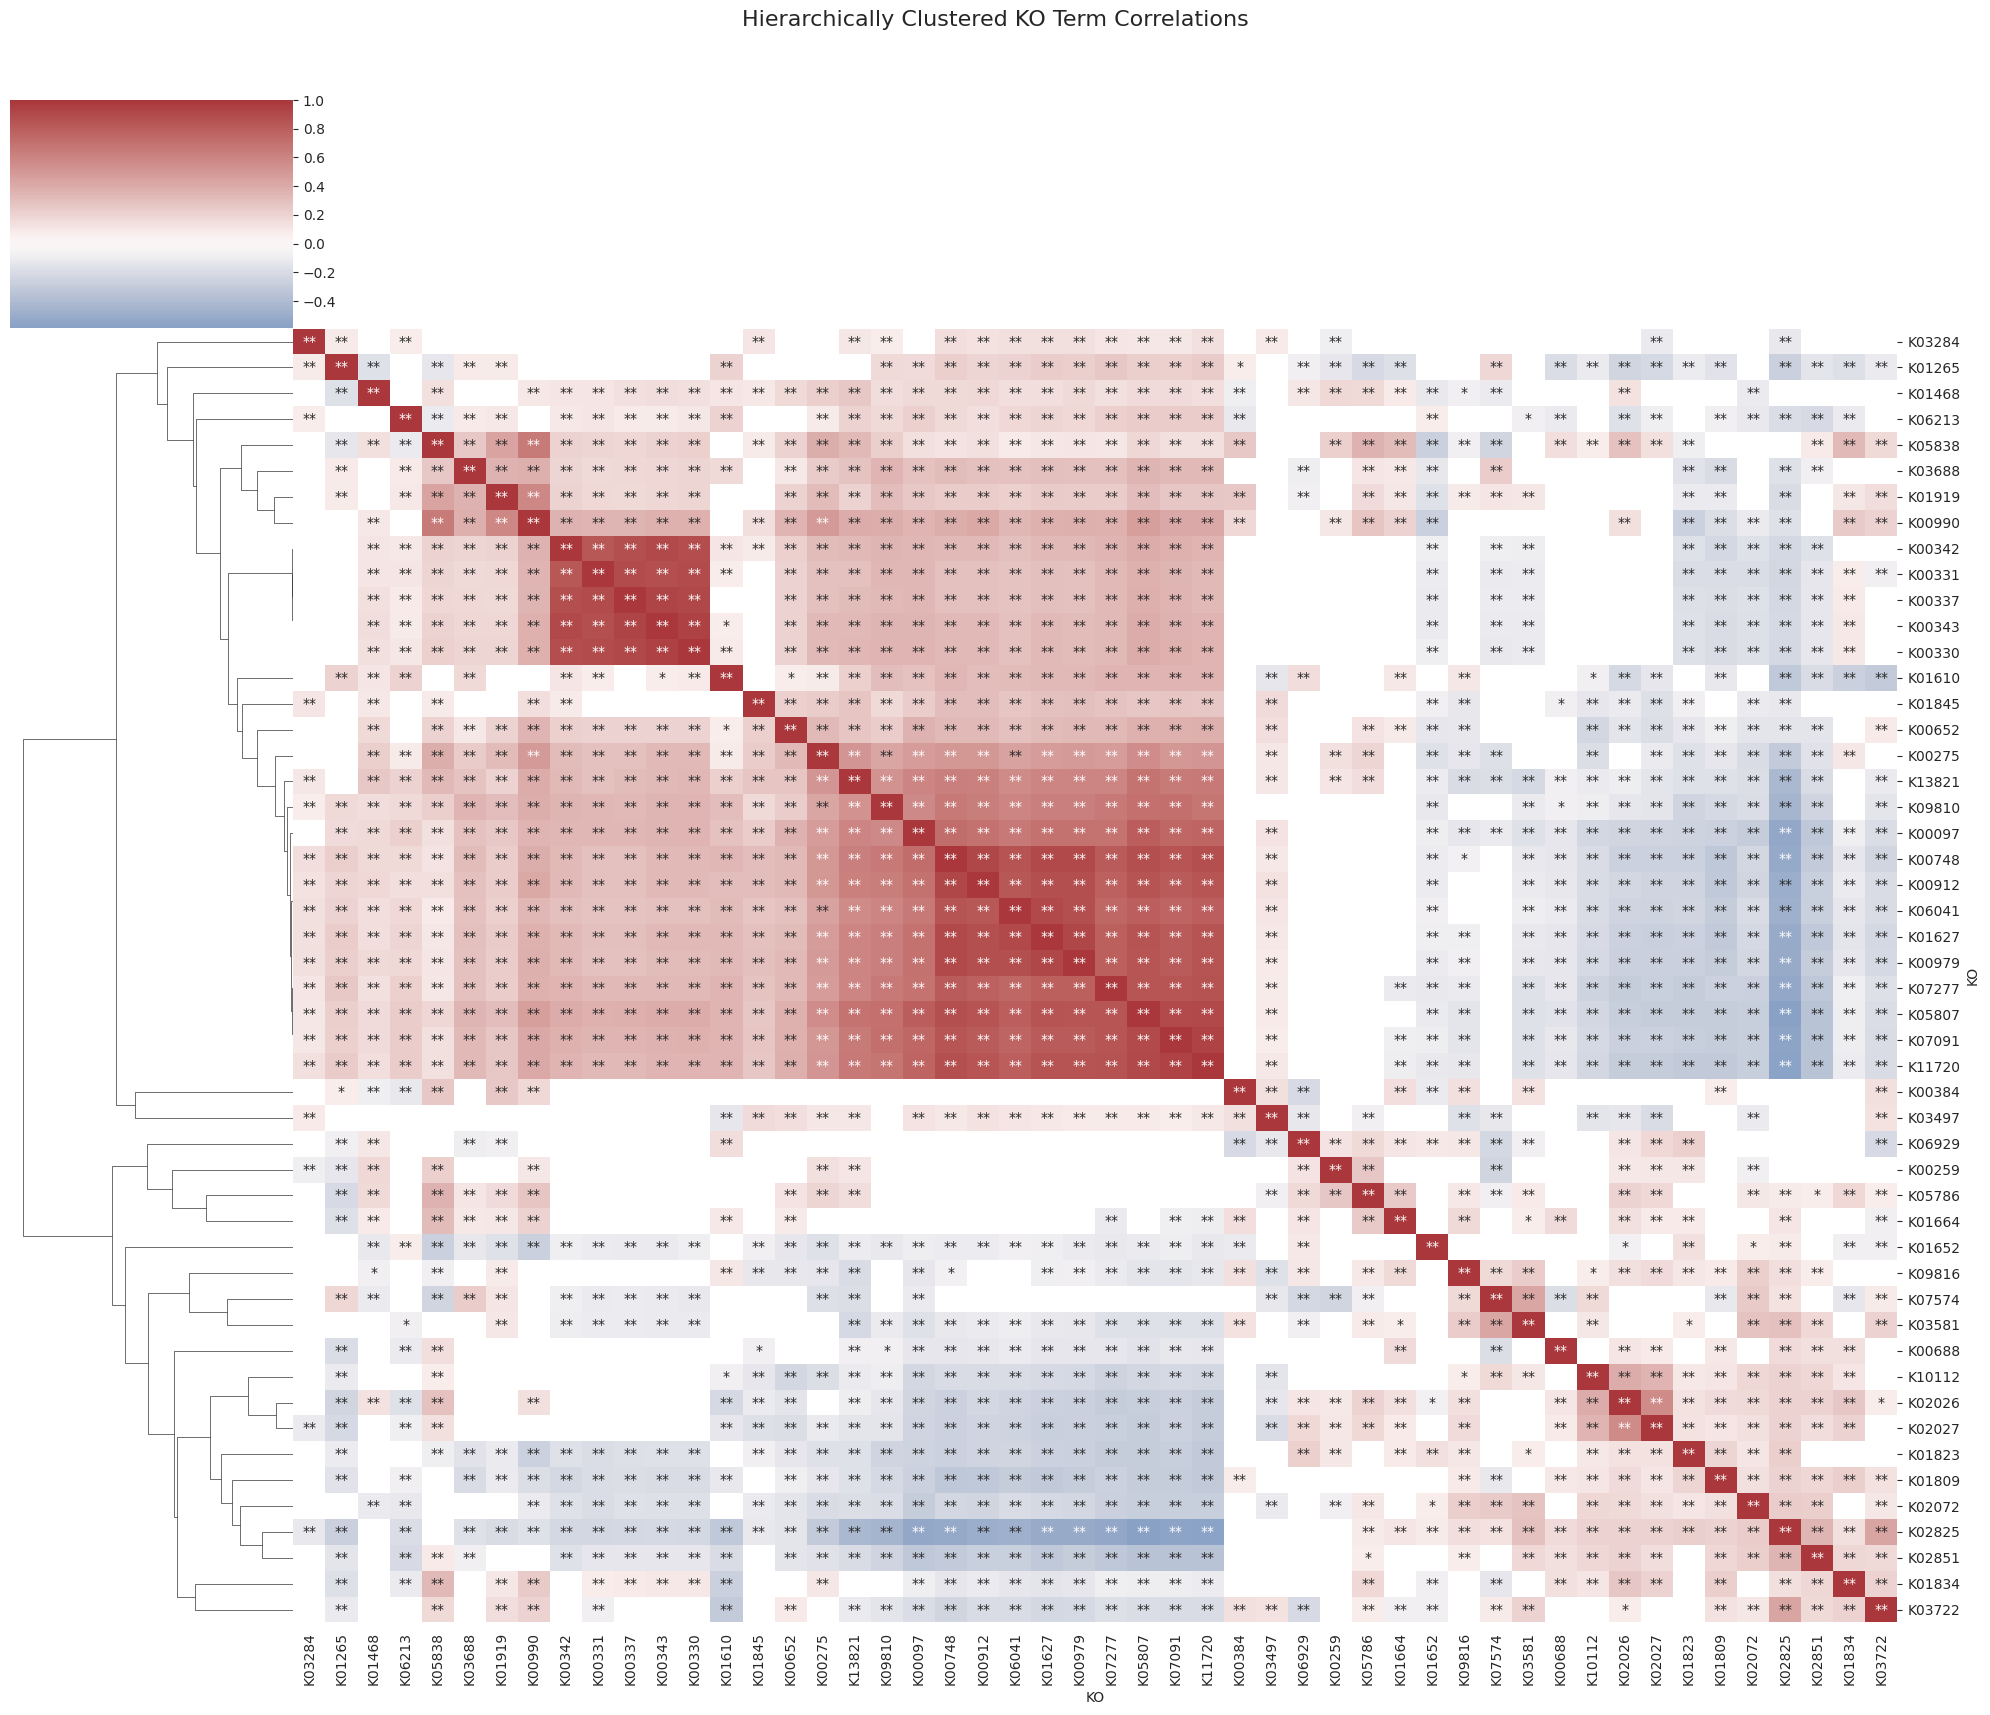

In [7]:
# Set professional style
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.linewidth'] = 0.5

# Prepare data
high_var_kos = variances.nlargest(50).index
corr_matrix = X_terms[high_var_kos].corr()

# Initialize p-value matrix
n_terms = corr_matrix.shape[0]
p_matrix = np.zeros((n_terms, n_terms))

# Compute p-values for all KO term pairs
for i in range(n_terms):
    for j in range(n_terms):
        r, p = pearsonr(X_terms[high_var_kos[i]], X_terms[high_var_kos[j]])
        p_matrix[i, j] = p

# Adjust for multiple testing (Bonferroni)
alpha = 0.05
n_tests = (n_terms * (n_terms - 1)) // 2  # Number of unique pairs
p_matrix_adj = np.minimum(p_matrix * n_tests, 1.0)

# Modify your heatmap code:
mask = p_matrix_adj > alpha  # Mask insignificant correlations
annot = np.where(p_matrix_adj < 0.01, "**", np.where(p_matrix_adj < 0.05, "*", "")) # Add asterisks to significant terms


# Create clustered heatmap
g = sns.clustermap(corr_matrix,
                   method='average',
                   metric='cosine',
                   cmap='vlag',
                   center=0,
                   annot=annot,  # Add significance markers
                   fmt='',  # Critical fix for string annotations
                   figsize=(20, 18),
                   row_cluster=True,
                   col_cluster=True,
                   mask=mask,  # Hide insignificant cells,
                   dendrogram_ratio=(0.15, 0.15),
                   cbar_pos=(0.02, 0.8, 0.05, 0.18))

# Access clustering order
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Add cluster boxes
Z = g.dendrogram_row.linkage
clusters = fcluster(Z, t=1.5, criterion='distance')

current_cluster = None
start_idx = 0
for idx, cl in enumerate(clusters[row_order]):
    if cl != current_cluster:
        if current_cluster is not None:
            width = idx - start_idx
            g.ax_heatmap.add_patch(plt.Rectangle(
                (start_idx, start_idx),
                width, width,
                fill=False,
                edgecolor=plt.cm.tab20(cl-1),
                lw=2))
        current_cluster = cl
        start_idx = idx



# Final formatting
# Set tick labels properly
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(),
                            rotation=90,
                            ha='center',
                            fontsize=10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),
                            rotation=0,
                            fontsize=10)

# Add main title
g.fig.suptitle('Hierarchically Clustered KO Term Correlations',
              fontsize=16, y=0.95)

# Adjust layout
plt.subplots_adjust(top=0.9)  # Make space for title

# Remove redundant column dendrogram
g.ax_col_dendrogram.set_visible(False)

plt.show()

This visualization reveals critical relationships between microbial gene functions (KEGG Orthology terms) and provides actionable insights into functional modules within your dataset. Here's how to interpret it:

1. Core Components
Heatmap Colors:

Red: Positive correlation (terms co-occur in strains)

Blue: Negative correlation (terms rarely coexist)

White: No correlation

Dendrograms:

Tree structures showing hierarchical relationships between KO terms

Branch lengths = dissimilarity (shorter branches = more similar terms)

Cluster Boxes:

Highlight groups of terms with shared correlation patterns

Color-coded by cluster membership

2. Key Biological Insights
A. Functional Modules
Clustered KO terms (red blocks) likely represent:

Co-regulated operons: Genes in the same metabolic pathway (e.g., K00250 + K00265 = glutamate synthesis)

Phylogenetic markers: Genes conserved in specific microbial clades

Stress response systems: e.g., Heat shock proteins clustered with chaperones

B. Metabolic Strategies
Anti-correlated clusters (blue regions) suggest:

Alternative pathways: e.g., Aerobic vs. anaerobic respiration genes

Niche specialization: Soil vs. marine strains with different nutrient uptake systems

C. Evolutionary Patterns

Short dendrogram branches: Highly conserved genes (e.g., ribosomal proteins)

Long branches: Horizontally transferred genes with variable presence

3. Actionable Observations
Cluster Feature	Biological Meaning	Example KO Terms
Tight red squares	Core pathway components	K00031 (Glycolysis enzymes)
Vertical blue stripes	Strain-specific adaptations	K02025 (ABC transporters)
Small isolated clusters	Rare functional units	K03105 (Antibiotic resistance)
4. Technical Validation
Cluster significance: Use the dendrogram’s distance scale (y-axis) to assess cluster robustness:

Groups with branch heights >1.5 (default cutoff) are statistically meaningful

False positives: Check if anti-correlated terms appear in the same KEGG pathway (may indicate data noise)

5. Limitations & Caveats
Correlation ≠ Causation: Co-occurrence may reflect:

Shared regulatory elements

Phylogenetic inheritance (not direct functional links)

Threshold sensitivity: Clusters depend on the t=1.5 cutoff in fcluster

Variance bias: Top 50 terms may exclude low-variance essential genes

c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'oxygen'. Unique keys: 3256
Data loaded successfully:
   Unnamed: 0 database  taxID  bacdiveID  \
0           0  bacdive    NaN        1.0   
1           1  bacdive    NaN        2.0   
2           2  bacdive    NaN        3.0   
3           3  bacdive    NaN        4.0   
4           4  bacdive    NaN        5.0   

                            speciesStrainComp    genusComp  \
0                       acetobacteracetib4114  acetobacter   
1                     acetobacteracetidsm3508  acetobacter   
2                acetobactercerevisiaedsm2324  acetobacter   
3                  acetobacterpasteurianus190  acetobacter   
4  acetobacterpasteurianusasaia5bu121porges38  acetobacter   

               speciesComp           strainComp  \
0         acetobacteraceti                b4114   
1         acetobacteraceti              dsm3508   
2    acetobactercerevisiae              dsm2324   
3  acetobacterpasteurianus                  190   
4  acetobacterpasteurianus  asa

c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)
c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'substrate'. Unique keys: 3226
Aggregated labels for 'gram'. Unique keys: 583


c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


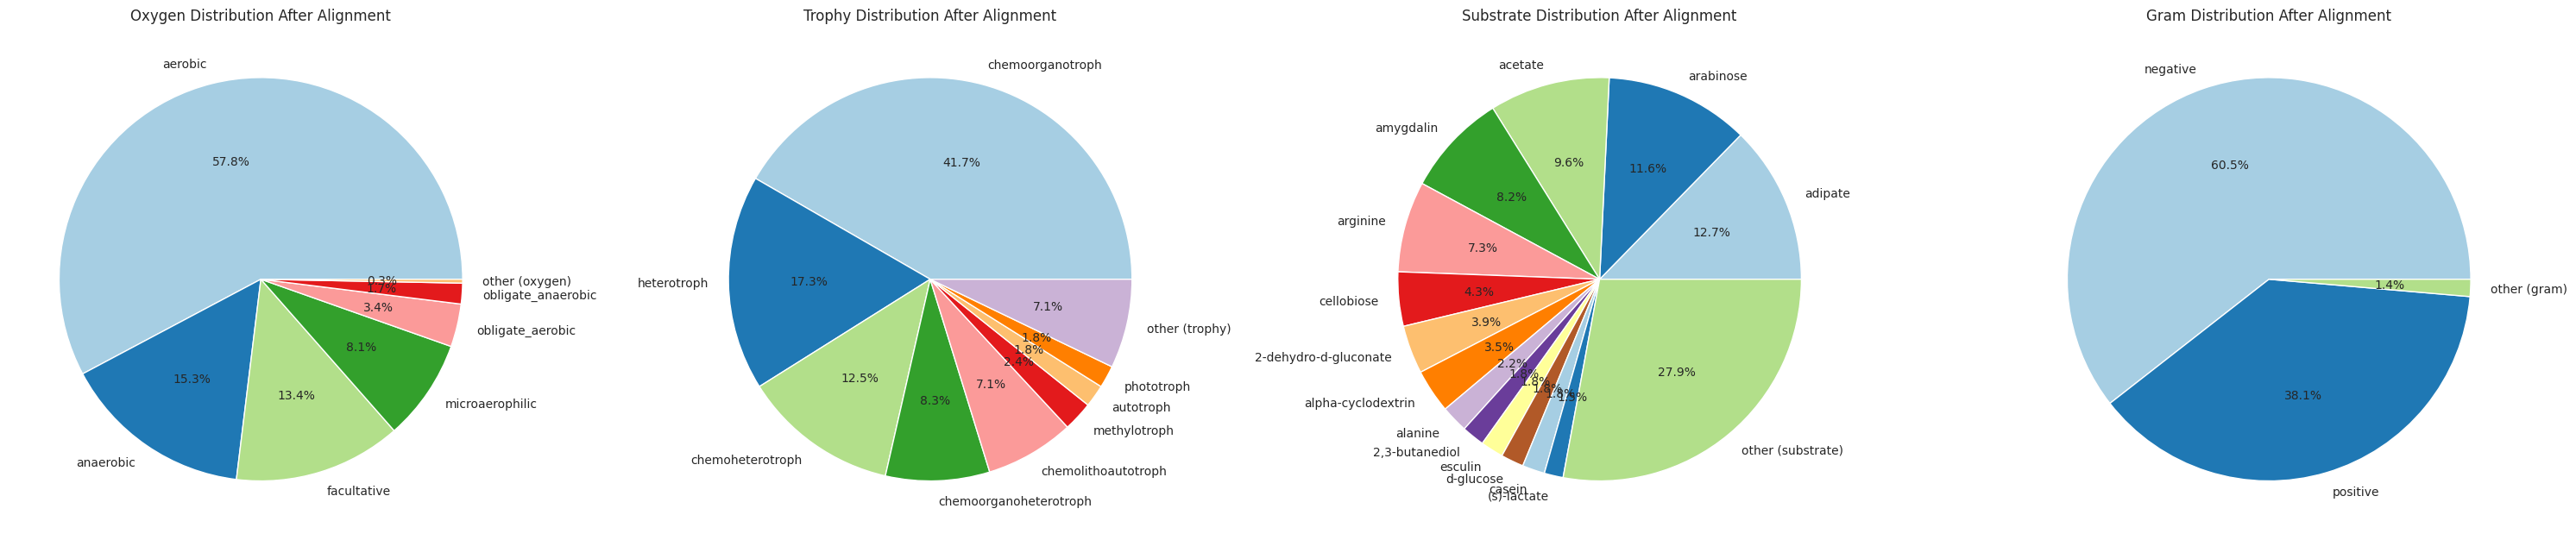

In [26]:
# Align data for each trait
traits_to_plot = ['oxygen', 'trophy', 'substrate', 'gram']
aligned_data = {}

for trait in traits_to_plot:
    y_trait = processor.preprocess_traits(
        reduced_traits, trait, use_assembled_if_missing=True
    )
    _, y_aligned = processor.align_data(X_terms, y_trait)
    aligned_data[trait] = y_aligned

# Function to group small categories into an 'other' bucket

def group_small_pie_counts(counts, trait, threshold_pct=1.4):
    total = counts.sum()
    pct = counts / total * 100
    small = pct < threshold_pct
    # Sum small categories
    other_count = counts[small].sum()
    # Keep only large categories
    counts = counts[~small]
    # Add other category if present
    if other_count > 0:
        counts[f'other ({trait})'] = other_count
    return counts

# Plot pie charts for each trait with grouping
fig, axes = plt.subplots(1, len(traits_to_plot), figsize=(30, 10))

for i, trait in enumerate(traits_to_plot):
    y_aligned = aligned_data[trait]
    counts = pd.Series(y_aligned).value_counts()
    grouped_counts = group_small_pie_counts(counts, trait)

    axes[i].pie(
        grouped_counts,
        labels=grouped_counts.index,
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'{trait.capitalize()} Distribution After Alignment')

plt.tight_layout()
plt.show()


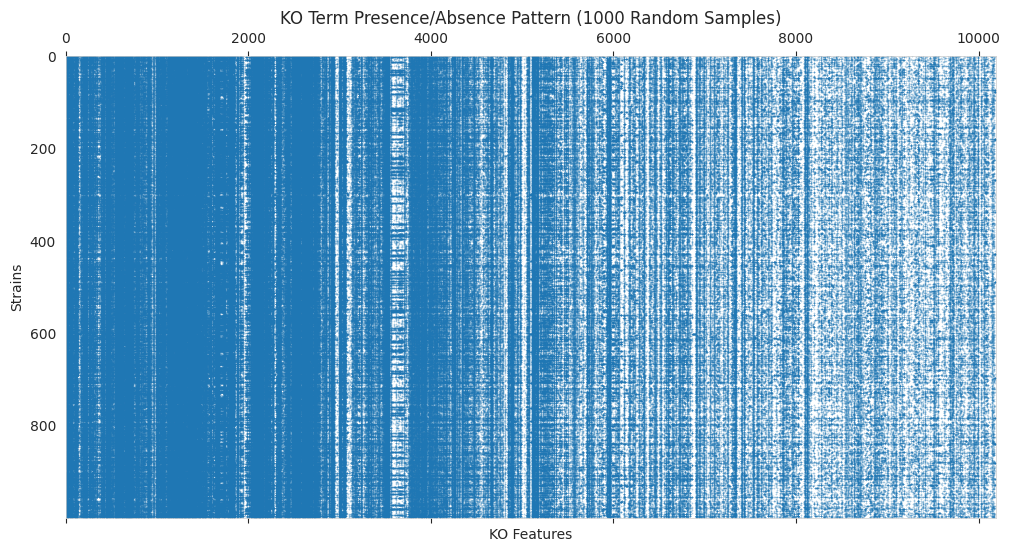

In [9]:
plt.figure(figsize=(12,6))
plt.spy(X_terms.sample(1000, random_state=42).values, 
       markersize=0.1, aspect='auto')
plt.title('KO Term Presence/Absence Pattern (1000 Random Samples)')
plt.xlabel('KO Features')
plt.ylabel('Strains')
plt.show()

In [10]:
stats = pd.DataFrame({
    'Reduced Dataset': [
        reduced_traits.shape[0],
        reduced_traits.shape[1],
        reduced_traits.isnull().sum().sum(),
        reduced_traits.nunique().median()
    ],
    'Processed Features': [
        X_aligned.shape[0],
        X_aligned.shape[1],
        X_aligned.astype(bool).sum().sum(),
        (X_aligned.sum(axis=1) / X_aligned.shape[1]).mean()
    ]}, index=['Samples', 'Features', 'Missing Values', 'Median Unique Values'])

stats.style.background_gradient(cmap='Blues')

,Reduced Dataset,Processed Features
Samples,3409.000000,583.000000
Features,18.000000,10188.000000
Missing Values,8507.000000,774293.000000
Median Unique Values,2951.000000,0.130361
